<a href="https://colab.research.google.com/github/sgevatschnaider/machine-learning/blob/main/notebooks/es/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html

# =========================================================
# 1. BLOQUES HTML ESTÁTICOS
# =========================================================

introduction_outliers_html = r"""
<div class="content-block">
    <h2>Definición y Naturaleza de los Outliers</h2>
    <p>Un <strong>outlier</strong> (o valor atípico) es una observación o punto de datos que se desvía significativamente del patrón general del resto del conjunto de datos. Formalmente, es una observación que parece ser inconsistente con el modelo estocástico asumido que genera los datos. La presencia de outliers puede deberse a múltiples causas:</p>
    <ul>
        <li><strong>Errores Sistémicos:</strong> Fallos en la recolección de datos, como un sensor mal calibrado o errores de entrada manual.</li>
        <li><strong>Eventos Genuinos y Raros:</strong> Observaciones legítimas pero extremas que representan la variabilidad inherente del fenómeno (ej., un crash bursátil, un descubrimiento científico inesperado).</li>
        <li><strong>Manipulación de Datos:</strong> Instancias fraudulentas o creadas intencionadamente para engañar al sistema (ej., transacciones con tarjetas de crédito robadas).</li>
    </ul>
    <p>La correcta identificación y gestión de outliers es un paso crítico en cualquier análisis de datos. Un outlier puede ser <strong>ruido</strong> que distorsiona los modelos estadísticos y de machine learning, o puede ser la <strong>señal</strong> más valiosa del dataset, revelando un comportamiento anómalo que requiere atención inmediata.</p>
</div>
"""

conclusion_outliers_html = r"""
<div class="content-block">
    <h2>Conclusión: El Outlier como Pregunta</h2>
    <p>Hemos recorrido el fenómeno de los outliers desde la estadística clásica hasta la inteligencia artificial avanzada. La lección fundamental es que un outlier no es simplemente un dato a eliminar, sino una <strong>pregunta que debe ser respondida</strong>. ¿Es un error? ¿Un fraude? ¿O representa una nueva dinámica en el sistema que estamos estudiando?</p>
    <p>Un manejo experto de los outliers trasciende la simple aplicación de una fórmula; requiere una combinación de rigor técnico, curiosidad investigativa y conocimiento del dominio. Ignorarlos conduce a modelos frágiles y conclusiones erróneas. Abrazarlos con una estrategia crítica puede desvelar las oportunidades y los riesgos más importantes ocultos en nuestros datos. La gestión de outliers es, en esencia, el arte de distinguir entre el ruido sin sentido y la valiosa verdad que se esconde en los extremos.</p>
    <p><strong>— Tu profesor experto en estadística y ciencia de datos</strong></p>
</div>
"""

# =========================================================
# 2. DATOS PARA TARJETAS DESPLEGABLES (CONTENIDO EXTENDIDO)
# =========================================================
outlier_cards_data = [
    {
        "titulo": r"1. Tipología y Ejemplos por Dominio",
        "contenido": r"""
            <h4>Outliers Univariados vs. Multivariados</h4>
            <p>Es crucial distinguir entre dos tipos principales de outliers:</p>
            <ul>
                <li><strong>Univariado:</strong> Un valor extremo en una única variable. Por ejemplo, una persona con una edad registrada de 150 años.</li>
                <li><strong>Multivariado:</strong> Una combinación de valores que, si bien pueden ser normales individualmente, en conjunto son anómalos. Por ejemplo, una persona que mide 1.90m y pesa 45kg. Ni la altura ni el peso son extremos por sí solos, pero su combinación es altamente improbable.</li>
            </ul>
            <h4>Ejemplos Detallados por Área de Aplicación</h4>
            <div class="table-container">
                 <table>
                    <thead><tr><th>Área</th><th>Ejemplo Detallado de Outlier</th><th>Naturaleza e Implicación</th></tr></thead>
                    <tbody>
                        <tr><td><strong>Estadística Médica</strong></td><td>Un paciente con una tasa de glucosa en ayunas de 450 mg/dL.</td><td>Podría ser un caso de diabetes severa no diagnosticada (evento genuino) o un error de laboratorio (error sistémico). Requiere verificación inmediata.</td></tr>
                        <tr><td><strong>Finanzas Cuantitativas</strong></td><td>Un activo financiero con una volatilidad implícita diaria que salta un 300%.</td><td>Generalmente un evento de mercado extremo (un "cisne negro") o un error en el feed de datos. Ignorarlo puede llevar a la quiebra de un fondo.</td></tr>
                        <tr><td><strong>Ingeniería y Calidad</strong></td><td>Un motor de avión que reporta una vibración 5 desviaciones estándar por encima de la media operativa.</td><td>Señal crítica de un posible fallo catastrófico inminente. Es un outlier que activa protocolos de mantenimiento predictivo.</td></tr>
                        <tr><td><strong>Detección de Fraude</strong></td><td>Una transacción de $0.50 realizada desde España, seguida 2 minutos después por una de $2000 desde Tailandia con la misma tarjeta.</td><td>Un claro outlier multivariado (valor, ubicación, tiempo) que indica un fraude casi con certeza.</td></tr>
                        <tr><td><strong>Visión por Computador</strong></td><td>En un lote de imágenes médicas, una radiografía completamente negra o con artefactos visuales extremos.</td><td>Fallo en el proceso de adquisición o corrupción del archivo. Contamina el set de entrenamiento si no se filtra.</td></tr>
                    </tbody>
                </table>
            </div>
        """
    },
    {
        "titulo": r"2. Métodos de Detección: De la Estadística al Deep Learning",
        "contenido": r"""
            <h4>Enfoques Estadísticos Clásicos</h4>
            <ol>
                <li><strong>Puntuación Z (Z-score):</strong> Mide cuántas desviaciones estándar se aleja un punto de la media. La fórmula es \( z = (x - \mu) / \sigma \). Un umbral común es \(|z| > 3\).
                    <blockquote><strong>Limitación:</strong> La media (\(\mu\)) y la desviación estándar (\(\sigma\)) son muy sensibles a los propios outliers, lo que puede enmascarar la detección (efecto de enmascaramiento). Funciona mejor en datos aproximadamente normales.</blockquote>
                </li>
                <li><strong>Rango Intercuartílico (IQR):</strong> Un método robusto no paramétrico. Se define un outlier como cualquier punto fuera del rango: \( [Q_1 - 1.5 \cdot IQR, Q_3 + 1.5 \cdot IQR] \), donde \(IQR = Q_3 - Q_1\).
                    <blockquote><strong>Ventaja:</strong> Al basarse en la mediana y los cuartiles, no se ve afectado por valores extremos, siendo ideal para distribuciones asimétricas o con colas pesadas.</blockquote>
                </li>
                 <li><strong>Distancia de Mahalanobis:</strong> Es la generalización multivariada del Z-score. Mide la distancia de un punto al centro de una distribución (centroide), teniendo en cuenta la covarianza entre variables. Es excelente para detectar outliers multivariados.</li>
            </ol>

            <h4>Algoritmos de Machine Learning</h4>
            <ol>
                <li><strong>Isolation Forest:</strong> Un algoritmo basado en árboles. Su intuición es que los outliers son "pocos y diferentes", por lo que son más fáciles de "aislar" del resto de los puntos. Las instancias que requieren menos divisiones aleatorias en un árbol para quedar aisladas reciben una puntuación de anomalía más alta. Es muy eficiente con grandes datasets.</li>
                <li><strong>Local Outlier Factor (LOF):</strong> Un algoritmo basado en densidad. No define un outlier de forma global, sino local. Compara la densidad de un punto con la de sus vecinos. Un punto en una región mucho menos densa que la de sus vecinos se considera un outlier. Es excelente para detectar anomalías en datasets con densidades variables.</li>
                <li><strong>DBSCAN (Density-Based Spatial Clustering of Applications with Noise):</strong> Es un algoritmo de clustering que agrupa puntos densamente empaquetados y marca como "ruido" (outliers) los puntos que se encuentran solos en regiones de baja densidad. Es una forma natural de identificar outliers sin tener que establecer un número de clústeres a priori.</li>
            </ol>

            <h4>Enfoques de Deep Learning y IA Generativa</h4>
             <ol>
                <li><strong>Autoencoders:</strong> Un tipo de red neuronal no supervisada que aprende a comprimir (codificar) y luego reconstruir (decodificar) los datos de entrada. Se entrena con datos "normales". Cuando se le presenta un outlier, la red lucha por reconstruirlo con precisión, resultando en un <strong>alto error de reconstrucción</strong>, que sirve como una clara señal de anomalía.</li>
                <li><strong>Modelos Generativos (GANs, VAEs):</strong> Estos modelos aprenden la distribución subyacente de los datos. Se pueden utilizar para la detección de anomalías evaluando qué tan "probable" es que el modelo genere una muestra específica. Las muestras con una probabilidad de generación muy baja se consideran outliers.</li>
            </ol>
        """
    },
    {
        "titulo": r"3. Consecuencias Críticas de una Mala Gestión",
        "contenido": r"""
            <p>Ignorar o manejar incorrectamente los outliers puede tener repercusiones severas en el análisis y en el negocio.</p>
            <h4>1. Corrupción de Parámetros Estadísticos</h4>
            <p>Un solo outlier extremo puede sesgar drásticamente estimadores como la media y la desviación estándar, e inflar las estimaciones de varianza. Esto lleva a intervalos de confianza incorrectos y a pruebas de hipótesis que pierden su potencia.</p>

            <h4>2. Degradación del Rendimiento del Modelo</h4>
            <p>Muchos algoritmos son sensibles a los outliers. Por ejemplo:</p>
            <ul>
                <li><strong>Modelos Lineales (Regresión, etc.):</strong> La función de coste de mínimos cuadrados penaliza los errores cuadráticamente, dando a los outliers una influencia desproporcionada que puede torcer completamente la línea de regresión.</li>
                <li><strong>Máquinas de Soporte Vectorial (SVM):</strong> Los outliers pueden afectar la posición del hiperplano de separación, llevando a un margen de clasificación subóptimo.</li>
                <li><strong>Algoritmos basados en centroides (K-Means):</strong> Los outliers pueden arrastrar los centroides de los clústeres, resultando en una segmentación incorrecta de los datos.</li>
            </ul>

            <h4>3. Riesgos Operativos y Financieros</h4>
            <blockquote>En el mundo real, los outliers a menudo representan los mayores riesgos. No detectar una transacción fraudulenta (un outlier) puede costar millones. No identificar una lectura anómala en un sensor industrial (un outlier) puede resultar en una falla catastrófica del equipo y poner en peligro vidas humanas.</blockquote>

            <h4>4. Sesgos y Problemas de Equidad (Fairness) en IA</h4>
            <p>Una de las consecuencias más sutiles y peligrosas. Si los datos de un grupo minoritario son "diferentes" al grupo mayoritario, un algoritmo ingenuo podría clasificarlos como outliers y excluirlos del entrenamiento o penalizarlos en la predicción. Esto puede llevar a sistemas de IA discriminatorios en áreas como la concesión de créditos, la contratación o el diagnóstico médico.</p>
        """
    },
    {
        "titulo": r"4. Estrategia de Gestión Holística de Outliers",
        "contenido": r"""
            <p>Un enfoque profesional no se limita a "eliminar si Z > 3". Requiere un proceso metodológico:</p>
            <ol>
                <li><strong>Detectar y Visualizar:</strong> El primer paso es utilizar una combinación de las técnicas descritas (boxplots, scatter plots, Isolation Forest, etc.) para identificar candidatos a outliers. La visualización es clave para entender su magnitud y contexto.</li>
                <li><strong>Investigar y Contextualizar:</strong> Este es el paso más importante. Antes de actuar, pregúntate: ¿De dónde viene este outlier? ¿Es un error de entrada? ¿Un fallo del sensor? ¿O un evento real y extremo? La respuesta a esta pregunta determina la acción a seguir.</li>
                <li><strong>Decidir la Estrategia de Manejo:</strong>
                    <ul>
                        <li><strong>Eliminación:</strong> Solo si tienes certeza absoluta de que el outlier es un error de medición o de entrada que no aporta información veraz.</li>
                        <li><strong>Imputación o Corrección:</strong> Si el outlier es un error pero puedes deducir su valor correcto o uno plausible (ej., a través de la media o mediana de un grupo similar).</li>
                        <li><strong>Transformación:</strong> Aplicar transformaciones como el logaritmo, la raíz cuadrada o Box-Cox puede reducir la asimetría de la distribución y disminuir la influencia de los outliers sin eliminarlos.</li>
                        <li><strong>Mantener y Usar Modelos Robustos:</strong> Si el outlier es un evento genuino e importante, la mejor estrategia es conservarlo y utilizar algoritmos que sean inherentemente robustos a su presencia (ej., regresión robusta como RANSAC, usar la mediana en lugar de la media, o modelos basados en árboles).</li>
                    </ul>
                </li>
                <li><strong>Modelado Separado:</strong> En algunos casos (ej., detección de fraude), los outliers son el objeto de estudio. La estrategia correcta es construir un modelo para los datos "normales" y otro específicamente para detectar y analizar estas anomalías.</li>
            </ol>
        """
    }
]

# =========================================================
# 3. GENERADOR DE TARJETAS
# =========================================================
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_html = seccion['titulo']
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_html}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

contenido_dinamico_html = generar_tarjetas_definiciones(outlier_cards_data)

# =========================================================
# 4. PLANTILLA GLOBAL PROFESIONAL
# =========================================================
plantilla_profesional = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{
      tex: {{
        inlineMath: [['$', '$'], ['\\(', '\\)']],
        displayMath: [['$$', '$$'], ['\\[', '\\]']],
        processEscapes: true,
        processEnvironments: true
      }},
      svg: {{
        fontCache: 'global'
      }}
    }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #1f2937 0%, #374151 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.8);
      --text-primary: #f9fafb;
      --text-secondary: #d1d5db;
      --text-light: #ffffff;
      --accent-primary: #60a5fa;
      --accent-secondary: #93c5fd;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.2);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
      --code-bg: #1a202c;
      --code-text: #e2e8f0;
      --code-comment: #a0aec0;
    }}
    [data-theme="light"] {{
      --bg-primary: linear-gradient(135deg, #e0e7ff 0%, #c7d2fe 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(249, 250, 251, 0.95);
      --text-primary: #1f2937;
      --text-secondary: #4b5563;
      --accent-primary: #4f46e5;
      --accent-secondary: #6366f1;
      --border-color: rgba(229, 231, 235, 0.9);
      --shadow-card: 0 15px 35px rgba(45, 55, 72, 0.1);
      --code-bg: #f3f4f6;
      --code-text: #111827;
      --code-comment: #6b7280;
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; text-shadow: 0 0 30px rgba(255,255,255,0.3); margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-bottom: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1.5rem; border-bottom: 2px solid var(--accent-primary); padding-bottom: 0.5rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); margin-bottom: 1rem; }}
    .content-block ul {{ list-style-type: '→ '; padding-left: 20px; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.4rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent-primary); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.8s cubic-bezier(0.25, 0.8, 0.25, 1), padding 1.8s cubic-bezier(0.25, 0.8, 0.25, 1); background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 1rem; font-size: 1.2rem; border-left: 4px solid var(--accent-primary); padding-left: 1rem; }}
    .topic-content h4:first-child {{ margin-top: 0; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content ol li::marker {{ font-weight: bold; color: var(--accent-primary); }}
    .topic-content ul li::marker {{ color: var(--accent-primary); }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{ border-left: 4px solid var(--accent-secondary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem; }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); border-radius: 10px; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 14px 18px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; border-top: 0; }}
    .MathJax {{ color: var(--text-primary) !important; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    {introduction_html}
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{ bodyEl.setAttribute('data-theme', theme); localStorage.setItem('theme', theme); if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }} }}
        themeToggleButton.addEventListener('click', () => {{ const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark'; setTheme(newTheme); }});
        setTheme(localStorage.getItem('theme') || 'dark');
        document.querySelectorAll('.topic-header').forEach(header => {{ header.addEventListener('click', () => {{ const card = header.parentElement; card.classList.toggle('open'); if (window.MathJax && card.classList.contains('open')) {{ window.MathJax.typesetPromise([card]).catch(err => console.log('MathJax typeset error:', err)); }} }}); }});
        const container = document.getElementById('particles-container');
        if (container) {{ for (let i = 0; i < 30; i++) {{ const p = document.createElement('div'); p.className = 'particle'; p.style.left = Math.random() * 100 + 'vw'; const size = (Math.random() * 5 + 2); p.style.width = size + 'px'; p.style.height = size + 'px'; p.style.animationDelay = Math.random() * -20 + 's'; p.style.animationDuration = (15 + Math.random() * 10) + 's'; p.style.opacity = 0.6; container.appendChild(p); }} }}
        window.addEventListener('load', () => {{ if (window.MathJax) {{ window.MathJax.typesetPromise().catch(err => console.log('Initial MathJax error:', err)); }} }});
    }})();
  </script>
</body>
</html>
"""

# =========================================================
# 5. RENDER FINAL
# =========================================================
final_html = plantilla_profesional.format(
    main_title="Análisis Profundo de Outliers",
    introduction_html=introduction_outliers_html,
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_outliers_html,
    footer_text="Material elaborado por Sergio Gevatschnaider."
)

display(HTML(final_html))

Área,Ejemplo Detallado de Outlier,Naturaleza e Implicación
Estadística Médica,Un paciente con una tasa de glucosa en ayunas de 450 mg/dL.,Podría ser un caso de diabetes severa no diagnosticada (evento genuino) o un error de laboratorio (error sistémico). Requiere verificación inmediata.
Finanzas Cuantitativas,Un activo financiero con una volatilidad implícita diaria que salta un 300%.,"Generalmente un evento de mercado extremo (un ""cisne negro"") o un error en el feed de datos. Ignorarlo puede llevar a la quiebra de un fondo."
Ingeniería y Calidad,Un motor de avión que reporta una vibración 5 desviaciones estándar por encima de la media operativa.,Señal crítica de un posible fallo catastrófico inminente. Es un outlier que activa protocolos de mantenimiento predictivo.
Detección de Fraude,"Una transacción de $0.50 realizada desde España, seguida 2 minutos después por una de $2000 desde Tailandia con la misma tarjeta.","Un claro outlier multivariado (valor, ubicación, tiempo) que indica un fraude casi con certeza."
Visión por Computador,"En un lote de imágenes médicas, una radiografía completamente negra o con artefactos visuales extremos.",Fallo en el proceso de adquisición o corrupción del archivo. Contamina el set de entrenamiento si no se filtra.


Librerías importadas y configuración de estilo completada.

--- 2.1. Detección Univariada con Boxplot (Método IQR) ---


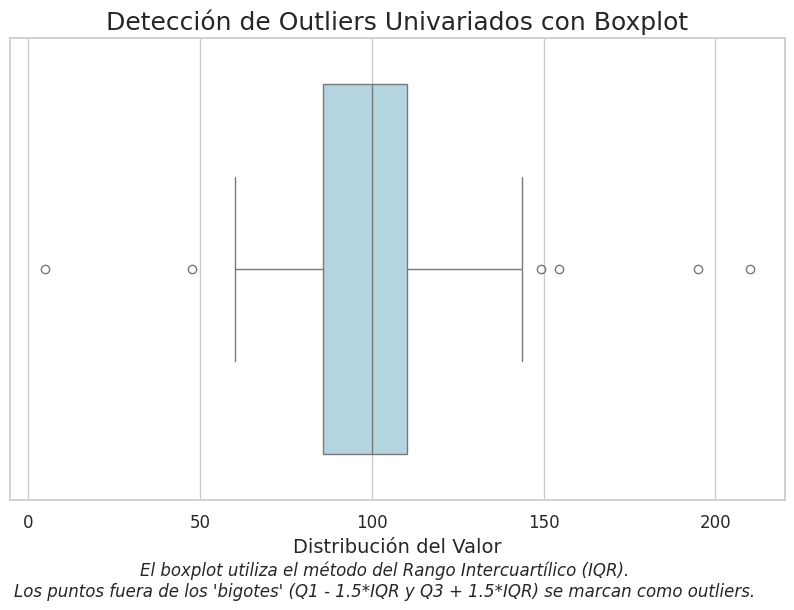


--- 2.2. Detección Univariada con Z-score ---


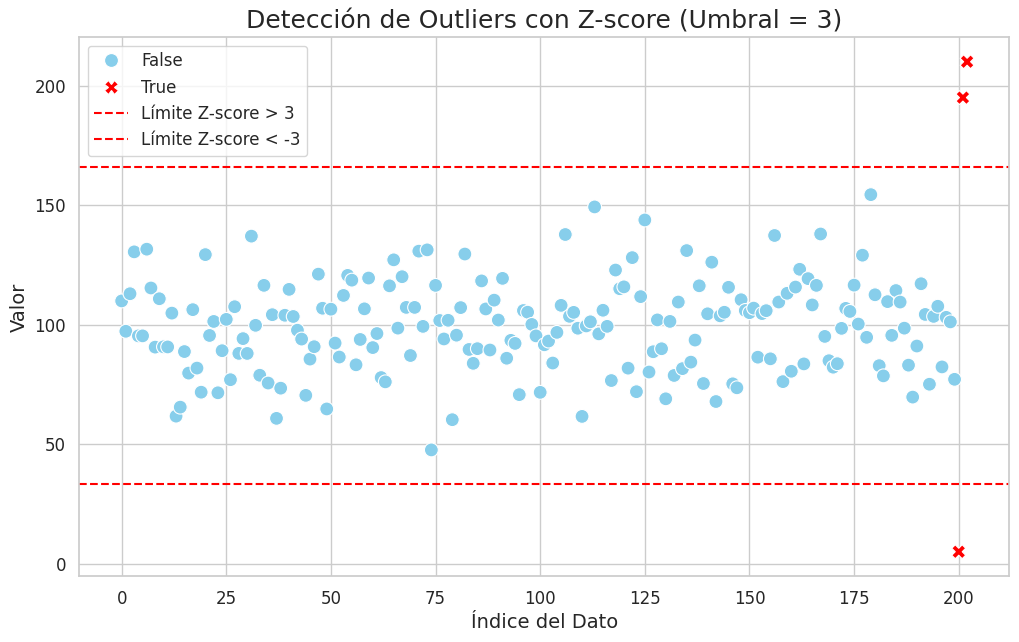

Outliers detectados por Z-score:
     Valor   z_score
200    5.0 -4.284291
201  195.0  4.307942
202  210.0  4.986276


--- 3.1. Detección Multivariada con Distancia de Mahalanobis ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


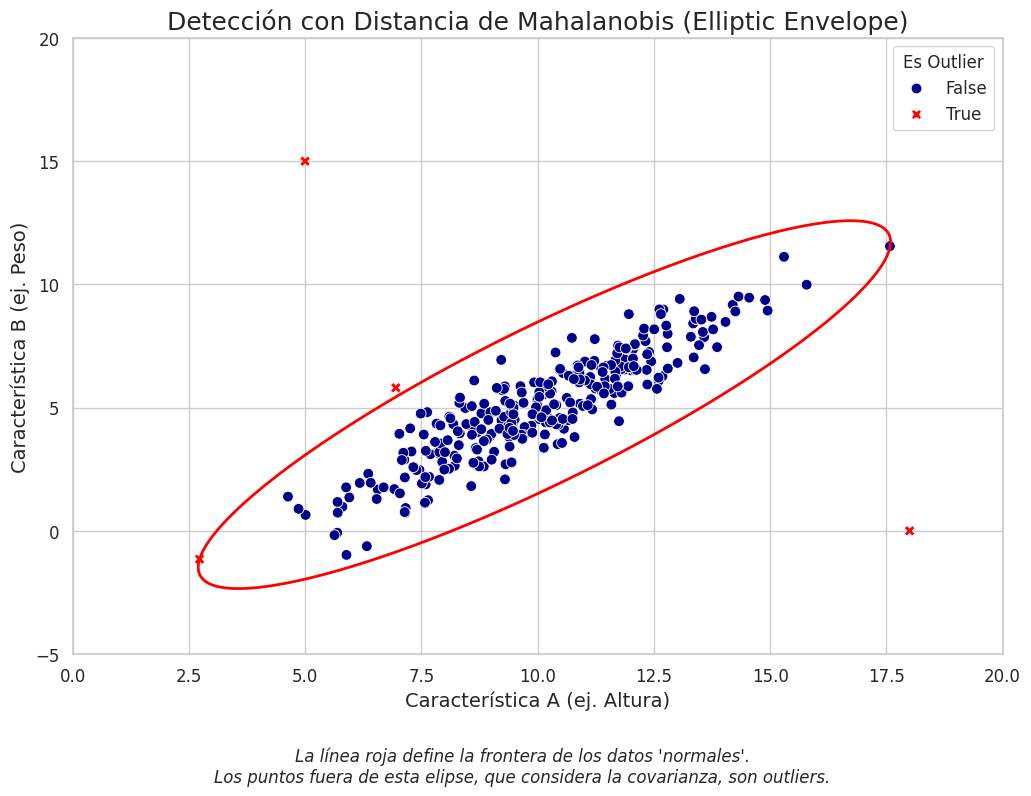


--- 3.2. Detección Multivariada con Isolation Forest ---


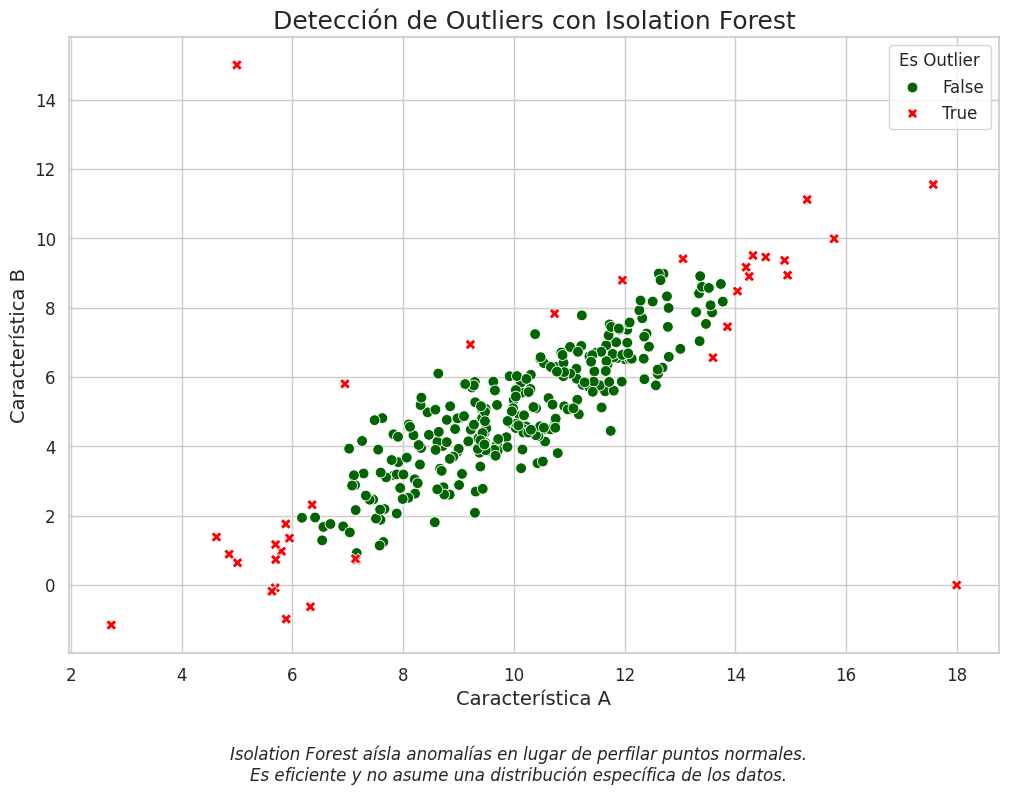


--- 3.3. Detección Multivariada con Local Outlier Factor (LOF) ---


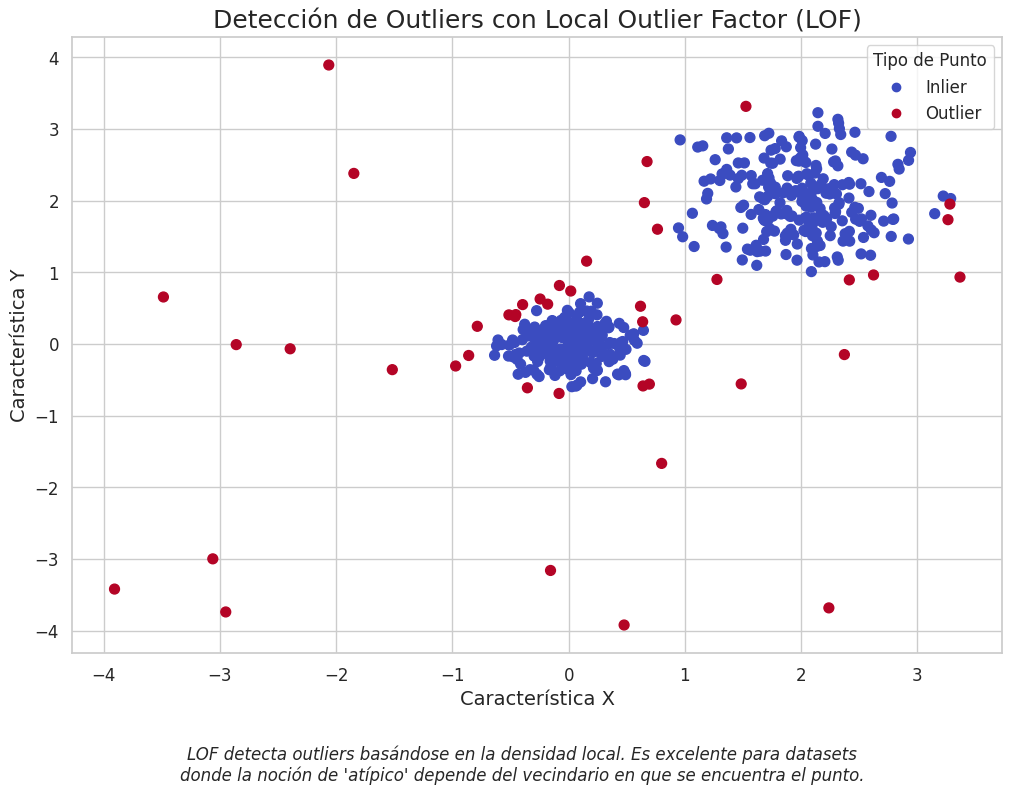



--- 4.1. Consecuencia: Corrupción de un Modelo de Regresión Lineal ---


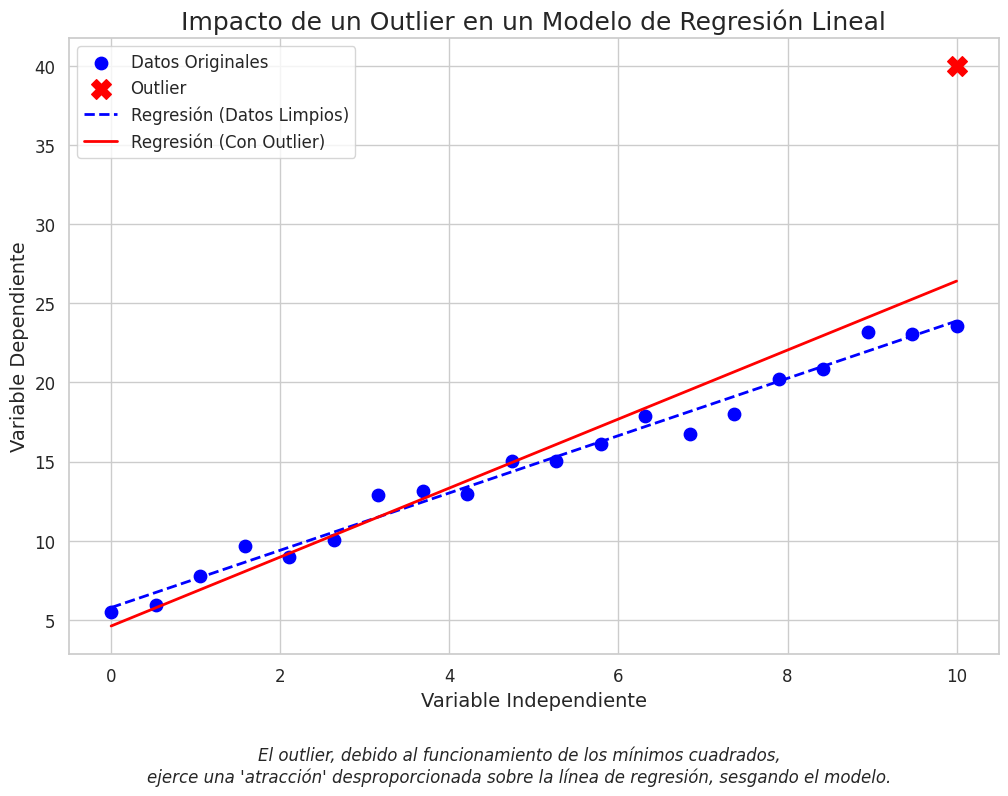



--- 5.1. Estrategia de Gestión: Transformación Logarítmica ---


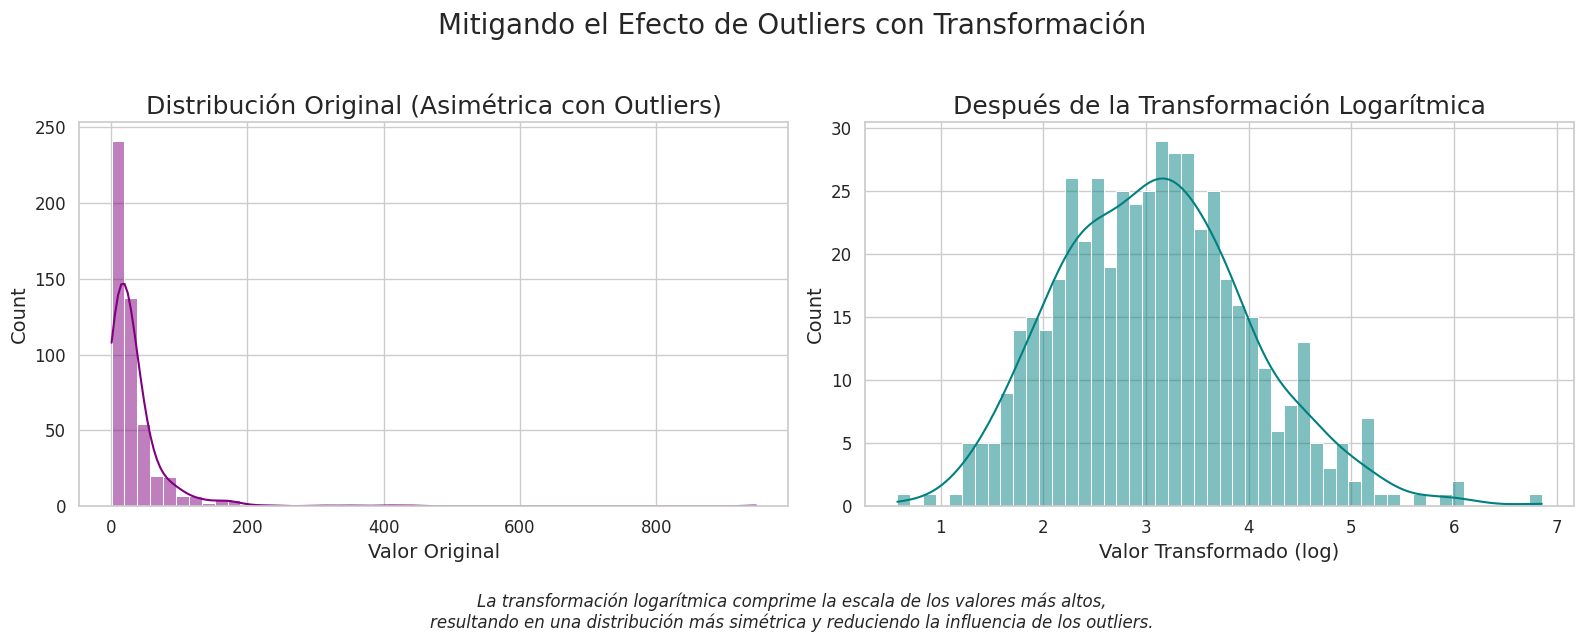

In [ ]:
# ======================================================================
# ANÁLISIS VISUAL Y PRÁCTICO DE OUTLIERS
# Código Complementario a la Exposición Teórica
#
# Profesor: Su Nombre
# Rol: Experto en Estadística y Desarrollo en Python
# ======================================================================

# ----------------------------------------------------------------------
# 1. CONFIGURACIÓN INICIAL E IMPORTACIÓN DE LIBRERÍAS
# ----------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope

# --- Ajustes estéticos para las visualizaciones ---
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 7)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12

print("Librerías importadas y configuración de estilo completada.")

# ======================================================================
# 2. VISUALIZACIÓN DE OUTLIERS UNIVARIADOS
# ======================================================================
# Como vimos, un outlier univariado es un valor extremo en una sola dimensión.
# Vamos a crear datos sintéticos para ilustrarlo.

# --- Generación de datos ---
np.random.seed(42)
# Datos normales
data_normal = np.random.normal(loc=100, scale=20, size=200)
# Añadimos outliers claros
data_with_outliers = np.concatenate([data_normal, [5, 195, 210]])
df_univariate = pd.DataFrame(data_with_outliers, columns=['Valor'])

# --- Detección con Rango Intercuartílico (IQR) a través de un Boxplot ---
print("\n--- 2.1. Detección Univariada con Boxplot (Método IQR) ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_univariate['Valor'], color='lightblue')
plt.title("Detección de Outliers Univariados con Boxplot")
plt.xlabel("Distribución del Valor")
plt.figtext(0.5, -0.05,
            "El boxplot utiliza el método del Rango Intercuartílico (IQR).\n"
            "Los puntos fuera de los 'bigotes' (Q1 - 1.5*IQR y Q3 + 1.5*IQR) se marcan como outliers.",
            ha="center", fontsize=12, style='italic')
plt.show()


# --- Detección con Puntuación Z (Z-score) ---
print("\n--- 2.2. Detección Univariada con Z-score ---")
mean = np.mean(df_univariate['Valor'])
std = np.std(df_univariate['Valor'])
df_univariate['z_score'] = (df_univariate['Valor'] - mean) / std
threshold = 3
outliers_z = df_univariate[abs(df_univariate['z_score']) > threshold]

plt.figure(figsize=(12, 7))
sns.scatterplot(x=df_univariate.index, y=df_univariate['Valor'],
                hue=abs(df_univariate['z_score']) > threshold,
                palette={True: 'red', False: 'skyblue'}, s=100, style=abs(df_univariate['z_score']) > threshold, markers={True: 'X', False: 'o'})

plt.axhline(mean + threshold * std, color='red', linestyle='--', label=f'Límite Z-score > {threshold}')
plt.axhline(mean - threshold * std, color='red', linestyle='--', label=f'Límite Z-score < -{threshold}')
plt.title(f"Detección de Outliers con Z-score (Umbral = {threshold})")
plt.xlabel("Índice del Dato")
plt.ylabel("Valor")
plt.legend()
plt.show()

print(f"Outliers detectados por Z-score:\n{outliers_z}")


# ======================================================================
# 3. VISUALIZACIÓN DE OUTLIERS MULTIVARIADOS
# ======================================================================
# El caso más interesante: una combinación de valores que es anómala.
# Generamos datos donde ninguna variable por sí sola es un outlier.

# --- Generación de datos ---
np.random.seed(42)
# Datos normales correlacionados
mean_vec = [10, 5]
cov_matrix = [[5, 4.5], [4.5, 5]]
data_multi_normal = np.random.multivariate_normal(mean_vec, cov_matrix, 300)
# Añadimos outliers multivariados
outliers_multi = np.array([[5, 15], [18, 0]]) # (altura, peso) -> (bajo, pesado) y (alto, ligero)
data_multi_with_outliers = np.concatenate([data_multi_normal, outliers_multi])
df_multivariate = pd.DataFrame(data_multi_with_outliers, columns=['Característica_A', 'Característica_B'])

# --- Detección con Distancia de Mahalanobis ---
print("\n\n--- 3.1. Detección Multivariada con Distancia de Mahalanobis ---")
# Usaremos EllipticEnvelope que se basa en esta distancia
ee = EllipticEnvelope(contamination=0.01, random_state=42)
predictions_ee = ee.fit_predict(df_multivariate) # -1 para outliers, 1 para inliers

plt.figure(figsize=(12, 8))
# Dibuja el contorno de la elipse de confianza
xx, yy = np.meshgrid(np.linspace(0, 20, 500), np.linspace(-5, 20, 500))
Z = ee.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

sns.scatterplot(data=df_multivariate, x='Característica_A', y='Característica_B',
                hue=(predictions_ee == -1), style=(predictions_ee == -1),
                palette={True: 'red', False: 'darkblue'}, s=60,
                markers={True: 'X', False: 'o'})
plt.title("Detección con Distancia de Mahalanobis (Elliptic Envelope)")
plt.xlabel("Característica A (ej. Altura)")
plt.ylabel("Característica B (ej. Peso)")
plt.legend(title="Es Outlier")
plt.figtext(0.5, -0.05,
            "La línea roja define la frontera de los datos 'normales'.\n"
            "Los puntos fuera de esta elipse, que considera la covarianza, son outliers.",
            ha="center", fontsize=12, style='italic')
plt.show()


# --- Detección con Isolation Forest ---
print("\n--- 3.2. Detección Multivariada con Isolation Forest ---")
iso_forest = IsolationForest(contamination='auto', random_state=42)
predictions_iso = iso_forest.fit_predict(df_multivariate)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_multivariate, x='Característica_A', y='Característica_B',
                hue=(predictions_iso == -1), style=(predictions_iso == -1),
                palette={True: 'red', False: 'darkgreen'}, s=60,
                markers={True: 'X', False: 'o'})
plt.title("Detección de Outliers con Isolation Forest")
plt.xlabel("Característica A")
plt.ylabel("Característica B")
plt.legend(title="Es Outlier")
plt.figtext(0.5, -0.05,
            "Isolation Forest aísla anomalías en lugar de perfilar puntos normales.\n"
            "Es eficiente y no asume una distribución específica de los datos.",
            ha="center", fontsize=12, style='italic')
plt.show()


# --- Detección con Local Outlier Factor (LOF) ---
print("\n--- 3.3. Detección Multivariada con Local Outlier Factor (LOF) ---")
# LOF es ideal para datos con densidades variables. Crearemos un caso así.
np.random.seed(42)
n_outliers = 20
ground_truth = np.ones(500, dtype=int)
ground_truth[-n_outliers:] = -1
X1 = 0.3 * np.random.randn(250 - n_outliers//2, 2)
X2 = 0.5 * np.random.randn(250 - n_outliers//2, 2) + np.array([2, 2])
X_lof = np.r_[X1, X2, np.random.uniform(low=-4, high=4, size=(n_outliers, 2))]
df_lof = pd.DataFrame(X_lof, columns=['X', 'Y'])

lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
predictions_lof = lof.fit_predict(df_lof)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_lof['X'], df_lof['Y'], c=(predictions_lof == -1), cmap=plt.cm.coolwarm, s=50)
plt.title("Detección de Outliers con Local Outlier Factor (LOF)")
plt.xlabel("Característica X")
plt.ylabel("Característica Y")
plt.legend(handles=scatter.legend_elements()[0], labels=['Inlier', 'Outlier'], title="Tipo de Punto")
plt.figtext(0.5, -0.05,
            "LOF detecta outliers basándose en la densidad local. Es excelente para datasets\n"
            "donde la noción de 'atípico' depende del vecindario en que se encuentra el punto.",
            ha="center", fontsize=12, style='italic')
plt.show()


# ======================================================================
# 4. CONSECUENCIAS DE LA MALA GESTIÓN DE OUTLIERS
# ======================================================================
# Demostremos visualmente por qué ignorar outliers es peligroso.

# --- Generación de datos para regresión ---
np.random.seed(42)
X_reg = np.linspace(0, 10, 20).reshape(-1, 1)
y_reg = 2 * X_reg.flatten() + 5 + np.random.normal(0, 1, 20)
# Añadimos un outlier con alto "leverage"
X_reg_out = np.vstack([X_reg, [10]])
y_reg_out = np.append(y_reg, 40)

# --- Modelos de Regresión Lineal ---
model_clean = LinearRegression().fit(X_reg, y_reg)
model_outlier = LinearRegression().fit(X_reg_out, y_reg_out)

# --- Comparación visual ---
print("\n\n--- 4.1. Consecuencia: Corrupción de un Modelo de Regresión Lineal ---")
plt.figure(figsize=(12, 8))
plt.scatter(X_reg, y_reg, color='blue', label='Datos Originales', s=80)
plt.scatter([10], [40], color='red', marker='X', s=200, label='Outlier')

# Líneas de regresión
plt.plot(X_reg, model_clean.predict(X_reg), color='blue', linestyle='--', lw=2, label='Regresión (Datos Limpios)')
plt.plot(X_reg_out, model_outlier.predict(X_reg_out), color='red', linestyle='-', lw=2, label='Regresión (Con Outlier)')

plt.title("Impacto de un Outlier en un Modelo de Regresión Lineal")
plt.xlabel("Variable Independiente")
plt.ylabel("Variable Dependiente")
plt.legend()
plt.grid(True)
plt.figtext(0.5, -0.05,
            "El outlier, debido al funcionamiento de los mínimos cuadrados,\n"
            "ejerce una 'atracción' desproporcionada sobre la línea de regresión, sesgando el modelo.",
            ha="center", fontsize=12, style='italic')
plt.show()


# ======================================================================
# 5. ESTRATEGIA DE GESTIÓN: TRANSFORMACIÓN DE DATOS
# ======================================================================
# Una estrategia común para mitigar el efecto de outliers es transformar los datos.

# --- Generación de datos asimétricos ---
np.random.seed(42)
data_skewed = np.random.lognormal(mean=3, sigma=1, size=500)
data_skewed = np.append(data_skewed, [350, 400]) # Añadir outliers

# --- Visualización antes y después de la transformación logarítmica ---
print("\n\n--- 5.1. Estrategia de Gestión: Transformación Logarítmica ---")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Antes de la transformación
sns.histplot(data_skewed, kde=True, ax=axes[0], bins=50, color='purple')
axes[0].set_title("Distribución Original (Asimétrica con Outliers)")
axes[0].set_xlabel("Valor Original")

# Después de la transformación
log_transformed_data = np.log1p(data_skewed) # log1p para manejar posibles ceros
sns.histplot(log_transformed_data, kde=True, ax=axes[1], bins=50, color='teal')
axes[1].set_title("Después de la Transformación Logarítmica")
axes[1].set_xlabel("Valor Transformado (log)")

plt.suptitle("Mitigando el Efecto de Outliers con Transformación", fontsize=20)
plt.figtext(0.5, -0.05,
            "La transformación logarítmica comprime la escala de los valores más altos,\n"
            "resultando en una distribución más simétrica y reduciendo la influencia de los outliers.",
            ha="center", fontsize=12, style='italic')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()